In [1]:
import os
import glob
import shutil

import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns


In [2]:
from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import label_figure

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
   

In [3]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

def label_figure(fig, data_identifier):                                                                                                                                     
    fig.text(0, 1,data_identifier, ha='left', va='top', fontsize=8)    

In [4]:
%matplotlib notebook

# Set source dirs

In [5]:
rootdir = '/n/coxfs01/2p-data'
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'

In [6]:
outdir = os.path.join(aggregate_dir, 'luminance-analysis')
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [7]:
if not os.path.exists(os.path.join(outdir, 'roi-luminance-arrays')):
    os.makedirs(os.path.join(outdir, 'roi-luminance-arrays'))

# Get aggregate data

In [8]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)


/n/coxfs01/julianarhee/aggregate-visual-areas


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

# Select datasets with RFs + blobs

In [9]:
include_sessions = []
included_ixs = []
for (animalid, session, fov), g in sdata.groupby(['animalid', 'session', 'fov']):
    if any(['rf' in v for v in g['experiment'].values]) and 'blobs' in g['experiment'].values:
        include_sessions.append((animalid, session, fov))
        included_ixs.extend(g.index.tolist())
        
        

In [10]:
len(include_sessions), len(included_ixs)

(36, 137)

In [11]:
dsets = sdata.loc[included_ixs]

# Get counts per area

In [12]:
dsets[dsets['experiment']=='blobs'].groupby(['visual_area']).count()

,animalid,experiment,fov,session
visual_area,,,,
Li,13,13,13,13
Lm,12,12,12,12
V1,11,11,11,11


In [13]:
dsets[dsets['experiment'].isin(['rfs', 'rfs10'])].groupby(['visual_area']).count()

,animalid,experiment,fov,session
visual_area,,,,
Li,14,14,14,14
Lm,12,12,12,12
V1,15,15,15,15


In [14]:
fovnums = [int(fv.split('_')[0][3:]) for fv in dsets['fov']]
dsets['fovnum'] = fovnums


In [15]:
dsets.head()

,animalid,experiment,fov,session,visual_area,fovnum
115,JC076,blobs,FOV1_zoom2p0x,20190420,V1,1
116,JC076,retino,FOV1_zoom2p0x,20190420,V1,1
117,JC076,rfs,FOV1_zoom2p0x,20190420,V1,1
118,JC076,blobs,FOV1_zoom2p0x,20190501,V1,1
119,JC076,retino,FOV1_zoom2p0x,20190501,V1,1


In [16]:
dsets.shape

(137, 6)

In [17]:
# incl_sessions = ['20190522', '20191006', '20190616',
#                  '20190609', '20190614', '20191018']

# dsets = dsets[dsets['session'].isin(incl_sessions)]


In [18]:
dsets.groupby(['visual_area']).count()


,animalid,experiment,fov,session,fovnum
visual_area,,,,,
Li,51,51,51,51,51
Lm,42,42,42,42,42
V1,44,44,44,44,44


# Load data

In [19]:
def get_trial_stats(animalid, session, fovnum, curr_exp='blobs',
                                   traceid='traces001', response_type='dff',
                                   responsive_test='ROC', responsive_thr=0.05, n_stds=0.):
    
    # Load experiment neural data
    fov = 'FOV%i_zoom2p0x' % fovnum
    if curr_exp == 'blobs':
        exp = util.Objects(animalid, session, fov, traceid=traceid)
    elif curr_exp == 'gratings':
        exp = util.Gratings(animalid, session, fov, traceid=traceid)
    else:
        print("DUNNO WHAT TO LOAD.")
        
    exp.load(trace_type='dff', update_self=True, make_equal=True)
    labels = exp.data.labels.copy()

    # Get stimulus config info
    sdf = exp.data.sdf
    sdf = reformat_morph_values(sdf)
    n_conditions = len(sdf['size'].unique())
    color_list = sns.color_palette('cubehelix', n_conditions)
    cond_colors = dict((k, color_list[i]) for i, k in enumerate(sorted(sdf['size'].unique()))) #.keys()))

    # ----- PUPIL/FACE STUFF -------------------------------
    # Add stimulus config info to face data
    trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
                             for trial, g in labels.groupby(['trial'])],
                  'trial': [int(trial[5:]) \
                             for trial, g in labels.groupby(['trial'])]})

    # ----- NEURAL STUFF -------------------------------
    # Get nrois x ntrials array
    roi_responses = pd.DataFrame(np.vstack([exp.data.traces.iloc[g.index].mean(axis=0)\
                                        for trial, g in labels.groupby(['trial'])]),
                                index=[int(trial[5:]) for trial, g in labels.groupby(['trial'])])

    # Get responsive cells
    responsive_cells, ncells_total = exp.get_responsive_cells(response_type=response_type,\
                                                              responsive_test=responsive_test, 
                                                              responsive_thr=responsive_thr,
                                                              n_stds=n_stds)
    print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
    neuraldata = roi_responses[responsive_cells]

    return neuraldata, trial_key, sdf
    

In [20]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


# Stim reformatiting functions

In [21]:
import cv2
def resize_image_to_coords(im, size_deg=30, pix_per_deg=10.01, aspect_scale=1.747):
    print(pix_per_deg)
    ref_dim = max(im.shape)
    resize_factor = ((size_deg*pix_per_deg) / ref_dim ) / pix_per_deg
    scale_factor = resize_factor * aspect_scale
    
    imr = cv2.resize(im, None, fx=scale_factor, fy=scale_factor)
    
    return imr

In [22]:
def resize_image_to_screen(im, size_deg=30, pix_per_deg=16.06, aspect_scale=1.747):
    ref_dim = max(im.shape)
    #resize_factor = ((size_deg*pix_per_deg) / ref_dim ) / pix_per_deg
    #print(resize_factor)
    #scale_factor = resize_factor * aspect_scale
    scale_factor = (size_deg*aspect_scale)/(1./pix_per_degW) / ref_dim
    imr = cv2.resize(im, None, fx=scale_factor, fy=scale_factor)

    return imr

In [23]:
def convert_range(oldval, newmin=None, newmax=None, oldmin=None, oldmax=None):
    oldrange = (oldmax - oldmin)
    newrange = (newmax - newmin)
    newval = (((oldval - oldmin) * newrange) / oldrange) + newmin
    return newval

# RF calculation functions

In [24]:
def update_rfparams(rfparams):

    screen_pix_x, screen_pix_y = rfparams['screen_resolution']
    screen_xmin_deg, screen_xmax_deg = rfparams['screen_xlim_deg']
    screen_ymin_deg, screen_ymax_deg = rfparams['screen_ylim_deg']
    stim_xpos, stim_ypos = rfparams['stim_pos']
    
    # Convert specified stim position to pixel space
    stim_xpos_pix = convert_range(stim_xpos, newmin=0, newmax=screen_pix_x, 
                                  oldmin=screen_xmin_deg, oldmax=screen_xmax_deg)
    stim_ypos_pix = convert_range(stim_ypos, newmin=0, newmax=screen_pix_y, 
                                  oldmin=screen_ymin_deg, oldmax=screen_ymax_deg)

    # Create "screen" array to project image onto
    stim_xpos_pix = int(round(stim_xpos_pix))
    stim_ypos_pix = int(round(stim_ypos_pix))
    #print(stim_xpos_pix, stim_ypos_pix)

    row_vals_pix = [convert_range(rv, newmin=0, newmax=screen_pix_y, 
                    oldmin=screen_ymin_deg, oldmax=screen_ymax_deg) for rv in rfparams['row_vals']]

    col_vals_pix = [convert_range(cv, newmin=0, newmax=screen_pix_x, 
                    oldmin=screen_xmin_deg, oldmax=screen_xmax_deg) for cv in rfparams['col_vals']]

    converted = {'stim_pos_pix': (stim_xpos_pix, stim_ypos_pix),
                 'row_vals_pix': row_vals_pix, 
                 'col_vals_pix': col_vals_pix}
    
    rfparams.update(converted)
    
    return rfparams


def transform_rfmap(rfmap, rfparams, pix_per_deg=16.05):

    # Normalize rf map to range bw (0, 1)
    normed_rfmap = rfmap/rfmap.max()

    # Resize RF map to match image array
    rfsize = int(np.ceil(pix_per_deg * rfparams['spacing']))
    print("rf tile size:", rfsize)

    # Create RF map array
    screen_x, screen_y = rfparams['screen_resolution']
    rfscreen = np.ones((screen_y, screen_x))
    for rii, ri in enumerate(rfparams['row_vals_pix']):
        for cii, ci in enumerate(rfparams['col_vals_pix']):
            r_ix = int(round(ri-(rfsize/2.)))
            c_ix = int(round(ci-(rfsize/2.)))
            #print(r_ix, c_ix)
            rfscreen[r_ix:r_ix+rfsize, c_ix:c_ix+rfsize] = normed_rfmap[rii, cii]

    return rfscreen

In [25]:

def transform_stim_image(curr_img, rfparams, size_deg=30., pix_per_deg=16.05):
    
    screen_pix_x, screen_pix_y = rfparams['screen_resolution']
    stim_xpos_pix, stim_ypos_pix = rfparams['stim_pos_pix']
    
    # Resize image (specify pixels based on selected size in degrees)
    imr_pix = resize_image_to_screen(curr_img, size_deg=size_deg, pix_per_deg=pix_per_deg) #, aspect_scale=1.747)

    # Pad resized image to match rf screen
    x_pad2 = round(screen_pix_x - (stim_xpos_pix + imr_pix.shape[1]/2.)) # Get far right edge
    x_pad1 = round(stim_xpos_pix - (imr_pix.shape[1]/2.)) # Get left edge
    y_pad1 = round(screen_pix_y - (stim_ypos_pix + imr_pix.shape[0]/2.)) # Get top edge
    y_pad2 = round(stim_ypos_pix - (imr_pix.shape[0]/2.)) # Get bottom edge

    imscreen = np.pad(imr_pix, (( int(abs(y_pad1)), int(abs(y_pad2)) ), \
                                ( int(abs(x_pad1)), int(abs(x_pad2)) )), mode='constant', constant_values=0)
    #print(size_deg, imscreen.shape)

    # Check if image is blown up beyond array size
    if x_pad2 < 0:     # need to trim right edge:
        imscreen = imscreen[:, 0:screen_pix_x]
        print("...overblown on right edge", imscreen.shape)
    elif x_pad1 < 0:   # need to trim left edge
        trim_left = screen_pix_x - imscreen.shape[1]
        imscreen = imscreen[:, trim_left:]
        print("...overblown on left edge", imscreen.shape)

    if y_pad2 < 0:     # need to trim bottom edge:
        imscreen = imscreen[0:screen_pix_y, :]
        print("...overblown on bottom edge", imscreen.shape)
    elif y_pad1 < 0:   # need to trim top edge
        trim_top = screen_pix_y - imscreen.shape[0]
        imscreen = imscreen[trim_top:, :]
        print("...overblown on top edge", imscreen.shape)

    # Check if need extra padding:
    if imscreen.shape[0] < screen_pix_y:
        n_pad_extra = screen_pix_y - imscreen.shape[0]
        imscreen = np.pad(im_screen, ((0, n_pad_extra), (0, 0)), mode='constant', constant_value=0)
        print("...padding %i to bottom" % n_pad_extra, imscreen.shape)
    elif imscreen.shape[0] > screen_pix_y:
        imscreen = imscreen[0:screen_pix_y, :]
        print("...trimming %i off bottom" % (imscreen.shape[0]-screen_pix_y), imscreen.shape)

    if imscreen.shape[1] < screen_pix_x:
        n_pad_extra = screen_pix_x - imscreen.shape[1]
        imscreen = np.pad(im_screen, ((0, 0), (0, n_pad_extra)), mode='constant', constant_value=0)
        print("...padding %i to right" % n_pad_extra, imscreen.shape)
    elif imscreen.shape[1] > screen_pix_x:
        imscreen = imscreen[:, 0:screen_pix_x]
        print("...trimming %i off right" % (imscreen.shape[1]-screen_pix_x), imscreen.shape)

    return imscreen


# Set responsivity params

In [26]:
responsive_test = 'ROC'
responsive_thr = 0.05
traceid = 'traces001'

In [27]:
exclude_sessions = ['JC078_20190426']

# Load object data

In [31]:
reload(util)

<module 'pipeline.python.classifications.experiment_classes' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.pyc'>

In [28]:
load_data = False
data_outfile = os.path.join(outdir, 'blobs_%s-%s-%.2f.pkl' % (response_type, responsive_test, responsive_thr))
if os.path.exists(data_outfile):
    with open(data_outfile, 'rb') as f:
        DATA = pkl.load(f)
else:
    load_data = True


In [28]:
load_data = False

In [33]:
curr_exp = 'blobs'

if load_data:
    DATA = {}
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
        if '_'.join([animalid, session]) in exclude_sessions:
            continue
 
        #datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp) 
        datakey ='%s_%s_fov%i' % (session, animalid, fovnum) 

        neuraldata, trial_key, sdf = get_trial_stats(animalid, session, fovnum, curr_exp,
                                                           traceid='traces001', response_type=response_type,
                                                           responsive_test='ROC', responsive_thr=0.05)

        DATA[datakey] = {'data': neuraldata,
                         'trial_key': trial_key,
                         'sdf': sdf}
    
    print("... saving extracted and formatted data...")
    print(data_outfile)
    with open(data_outfile, 'wb') as f:
        pkl.dump(DATA, f, protocol=pkl.HIGHEST_PROTOCOL)


... [JC076|20190502|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC076/20190502/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_bc0893_traces001_05b262_traces001_cdf7b0_traces001_2649ff_traces001_e62928_traces001_82b664/data_arrays/np_subtracted.npz
NP_subtracted offset was: 187.55
adding NP offset... (NP baseline offset: 797.67)
((245946, 226), (226,), ())
... adjusting for equal reps / condn...
... updating self
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC076/20190502/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_bc0893_traces001_05b262_traces001_cdf7b0_traces001_2649ff_traces001_e62928_traces001_82b664/summary_stats/ROC/roc_results.pkl']
60 out of 226 cells pass responsive test.
... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... 

... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC099/20190617/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_94cb73_traces001_9d8a71_traces001_7a514c_traces001_864da3/data_arrays/np_subtracted.npz
NP_subtracted offset was: 3.88
adding NP offset... (NP baseline offset: 854.19)
((131355, 102), (102,), ())
... adjusting for equal reps / condn...
... updating self
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC099/20190617/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_94cb73_traces001_9d8a71_traces001_7a514c_traces001_864da3/summary_stats/ROC/roc_results.pkl']
9 out of 102 cells pass responsive test.
... [JC113|20191018|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/combined_blobs_static/t

NP_subtracted offset was: 78.51
adding NP offset... (NP baseline offset: 773.60)
((201000, 275), (275,), ())
... updating self
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_e17055_traces001_dd9e99_traces001_841aa9_traces001_d4242f_traces001_7b3713_traces001_d4ccf3/summary_stats/ROC/roc_results.pkl']
122 out of 275 cells pass responsive test.
... [JC083|20190508|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_0f1e0a_traces001_1410d6_traces001_1023f7_traces001_9c6c51_traces001_3ea54b_traces001_249fdc/data_arrays/np_subtracted.npz
NP_subtracted offset was: 102.25
adding NP offset... (NP baseline offset: 590.61)
((262235, 256), (256,), ())
... adjustin

GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_95dedb_traces001_e403bc_traces001_78845b_traces001_045759_traces001_e7bfd6_traces001_c43fca/data_arrays/np_subtracted.npz
NP_subtracted offset was: 95.94
adding NP offset... (NP baseline offset: 430.59)
((268500, 177), (177,), ())
... updating self
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_95dedb_traces001_e403bc_traces001_78845b_traces001_045759_traces001_e7bfd6_traces001_c43fca/summary_stats/ROC/roc_results.pkl']
89 out of 177 cells pass responsive test.
... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... lo

NameError: name 'data_outfile' is not defined

In [34]:
# # SAVE
#data_outfile = os.path.join(outdir, 'blobs_%s-%s-%.2f.pkl' % (response_type, responsive_test, responsive_thr))
print(data_outfile)
with open(data_outfile, 'wb') as f:
    pkl.dump(DATA, f, protocol=pkl.HIGHEST_PROTOCOL)
        

/n/coxfs01/julianarhee/aggregate-visual-areas/luminance-analysis/blobs_dff-ROC-0.05.pkl


#  Load stimulus images

In [41]:
# Get image paths:
stimulus_dir = '/home/julianarhee/Repositories/protocols/physiology/stimuli/images'
#sdf = DATA[datakey]['sdf']
#morph_levels = [m for m in sdf['morphlevel'].unique() if m != -1]
object_list = ['D1', 'M14', 'M27', 'M40', 'M53', 'M66', 'M79', 'M92', 'D2']
#object_list = ['D1', 'D2']

image_paths = []
for obj in object_list:
    stimulus_type = 'Blob_%s_Rot_y_fine' % obj
    image_paths.extend(glob.glob(os.path.join(stimulus_dir, stimulus_type, '*_y0.png')))
print("%i images found for %i objects" % (len(image_paths), len(object_list)))

images = {}
for object_name, impath in zip(object_list, image_paths):
    im = cv2.imread(impath)
    if object_name == 'D1':
        object_name = 'M0'
    if object_name == 'D2':
        object_name = 'M106'
    images[object_name] = im[:, :, 0]
print("im shape:", images['M0'].shape)


9 images found for 9 objects
('im shape:', (618, 1080))


# Get data

In [78]:
session = '20190522'
animalid = 'JC084'
fovnum = 1
fov = 'FOV%i_zoom2p0x' % fovnum
datakey ='%s_%s_fov%i' % (session, animalid, fovnum)  
print(datakey)


20190522_JC084_fov1


In [82]:
# Get ROI list for objects
rois_objects = np.array(DATA['%s_blobs' % datakey]['data'].columns.tolist())
sizes = sorted(DATA['%s_blobs' % datakey]['sdf']['size'].unique())

# Load RF data
g = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fov']==fov)]
if 'rfs10' in g['experiment']:
    curr_exp = 'rfs10'
else:
    curr_exp = 'rfs'

exp = util.ReceptiveFields(curr_exp, animalid, session, fov, traceid=traceid)
rfstats, rois_rfs, nrois_total = exp.get_rf_fits(response_type=response_type, fit_thr=0.05)

print("Blobs: %i, RFs: %i" % (len(rois_objects), len(rois_rfs)))

# Get ROIs for both
roi_list = np.intersect1d(rois_objects, rois_rfs)
print("%i rois common to both." % len(roi_list))

... [JC084|20190522|FOV1_zoom2p0x] creating rfs object
GET ROI SET: rois001
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
Blobs: 100, RFs: 165
84 rois common to both.


# Load session object

In [42]:
S = util.Session(animalid, session, fov, rootdir=rootdir)

# Get screen bounds: [bottom left upper right]
screen_bounds = [S.screen['linminH'], S.screen['linminW'], S.screen['linmaxH'], S.screen['linmaxW']]
screen_aspect = S.screen['resolution'][0] / S.screen['resolution'][1]

screen_width_deg = S.screen['linmaxW']*2
screen_height_deg = S.screen['linmaxH']*2

pix_per_degW = S.screen['resolution'][0] / screen_width_deg
pix_per_degH = S.screen['resolution'][1] / screen_height_deg 

print(pix_per_degW, pix_per_degH)
pix_per_deg = np.mean([pix_per_degW, pix_per_degH])
print("avg pix/deg: %.2f" % pix_per_deg)

stim_xpos, stim_ypos = S.get_stimulus_coordinates()

[JC084] 20190522 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...
(16.059366123436302, 16.042065861592622)
avg pix/deg: 16.05
... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC084|20190522|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info for: combined_gratings_static
Stimuli presented at coords: (20, -8)


In [85]:
print(datakey)
DATA['%s_blobs' % datakey]['data'].shape


20190522_JC084_fov1


(1500, 100)

In [91]:

# Add stimulus config info to face data
labels = DATA['%s_blobs' % datakey]['labels']
trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
                         for trial, g in labels.groupby(['trial'])],
              'trial': [int(trial[5:]) \
                         for trial, g in labels.groupby(['trial'])]})

# Get blob stats
neuraldata = DATA['%s_blobs' % datakey]['data'].copy()
blobstats = pd.concat([neuraldata, trial_key], axis=1)
blobstats.index = blobstats['trial']
blobstats.drop('trial', axis=1, inplace=True)

# Calculate RF stimulus metrics

In [43]:
rfparams = {'screen_xlim_deg': (S.screen['linminW'], S.screen['linmaxW']),
            'screen_ylim_deg': (S.screen['linminH'], S.screen['linmaxH']),
            'screen_resolution': tuple(S.screen['resolution']),
            'col_vals': rfstats['col_vals'],
            'row_vals': rfstats['row_vals'],
            'spacing': np.diff(rfstats['row_vals']).mean(),\
            'stim_pos': (stim_xpos, stim_ypos)}

rfparams = update_rfparams(rfparams)

# Resize image to specified degrees, map to screen coordinates
1. Get screen size in pixels and degrees (pix_per_deg)
2. Calculate resize factor for image in pixels, based on specified size + position (degrees), and known screen res
3. Resize image and pad to position it correctly in pixel space of screen
4. Get RF map in screen coords (pixels)
5. Plot overay

In [44]:
# #Choose an image & size
# size_deg = 50
# curr_object = 'M0'
# curr_img = images[curr_object]
# imscreen = transform_stim_image(curr_img, rfparams, size_deg=size_deg, pix_per_deg=pix_per_deg)

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))


<IPython.core.display.Javascript object>


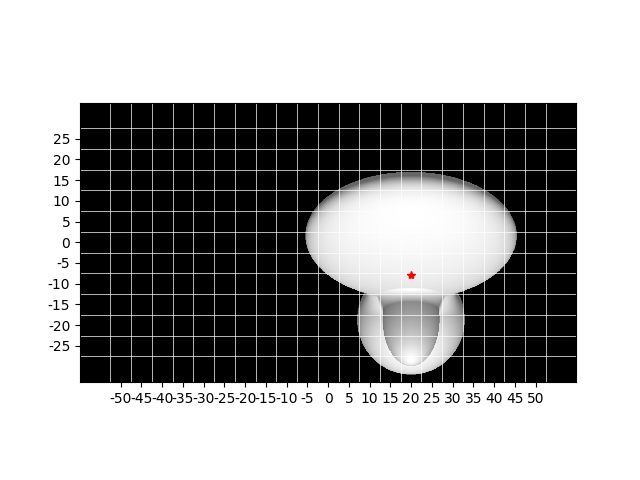

In [45]:
# fig, ax = pl.subplots()
# ax.imshow(np.flipud(imscreen), origin='bottom', alpha=1, cmap='gray')
# #ax.set_xlim([0, rfparmas['screen_pix_x'])
# #ax.set_ylim([0, rfparmas['screen_pix_y']])

# # Draw cells for RF tiling boundaries
# for rv in rfparams['col_vals_pix']:
#     ax.axvline(rv - pix_per_deg*rfparams['spacing']/2., color='w', lw=0.5)
# ax.axvline(rv + pix_per_deg*rfparams['spacing']/2., color='w', lw=0.5)
# for rv in rfparams['row_vals_pix']:
#     ax.axhline(rv - pix_per_deg*rfparams['spacing']/2., color='w', lw=0.5)
# ax.axhline(rv + pix_per_deg*rfparams['spacing']/2., color='w', lw=0.5)


# ax.set_xticks(rfparams['col_vals_pix'])
# ax.set_xticklabels([int(i) for i in rfparams['col_vals']])

# ax.set_yticks(rfparams['row_vals_pix'])
# ax.set_yticklabels([int(i) for i in rfparams['row_vals']])

# #ax.grid(True)

# stim_xpos_pix, stim_ypos_pix = rfparams['stim_pos_pix']
# ax.plot(stim_xpos_pix, stim_ypos_pix, 'r*')

#### Check RF

In [46]:
rid =  93; #roi_list[0]
rfmap = rfstats['fit_results'][rid]['data']


In [47]:
# fig, ax = pl.subplots()
# ax.imshow(rfmap, origin='bottom')
# ax.set_yticks(np.arange(0, len(rfstats['row_vals'])))
# ax.set_yticklabels([int(r) for r in rfstats['row_vals']], fontsize=6)
# ax.set_xticks(np.arange(0, len(rfstats['col_vals'])))
# ax.set_xticklabels([int(r) for r in rfstats['col_vals']], fontsize=6)

In [48]:
rfscreen = transform_rfmap(rfmap, rfparams)



('rf tile size:', 81)


In [49]:
rfscreen.shape

(1080, 1920)

<IPython.core.display.Javascript object>


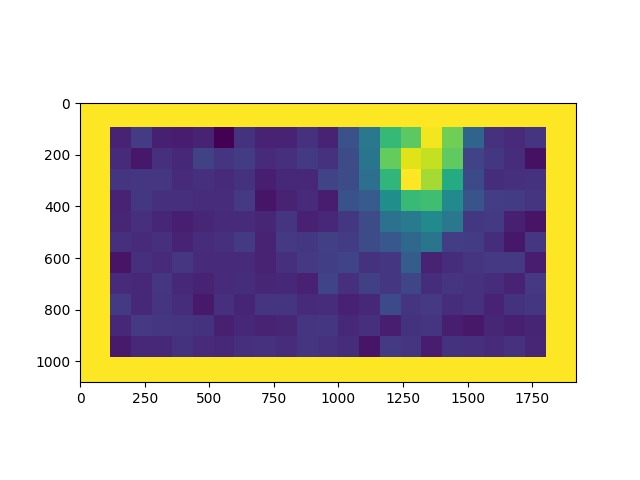

In [50]:
pl.figure()
pl.imshow(rfscreen)#, origin='bottom')

In [51]:
def plot_luminance_calculation(imarray, rfarray, lumarray, rfparams,
                               rf_cmap='hot', lum_cmap='jet'):
    
    fig, axes = pl.subplots(1, 3, figsize=(15,3))

    axes[0].imshow(imarray, origin='bottom', alpha=1, cmap='gray')
    axes[1].imshow(rfarray, origin='bottom', alpha=1, cmap=rf_cmap)
    axes[2].imshow(lumarray, origin='bottom', alpha=1, cmap=lum_cmap)

    for ax in axes:

        # Draw cells for RF tiling boundaries
        for rv in rfparams['col_vals_pix']:
            ax.axvline(rv - pix_per_deg*rfparams['spacing']/2., color='w', lw=0.5)
        ax.axvline(rv + pix_per_deg*rfparams['spacing']/2., color='w', lw=0.5)
        for rv in rfparams['row_vals_pix']:
            ax.axhline(rv - pix_per_deg*rfparams['spacing']/2., color='w', lw=0.5)
        ax.axhline(rv + pix_per_deg*rfparams['spacing']/2., color='w', lw=0.5)

        # Label coordinates
        ax.set_xticks(rfparams['col_vals_pix'])
        ax.set_xticklabels([int(i) for i in rfparams['col_vals']], fontsize=6)

        ax.set_yticks(rfparams['row_vals_pix'])
        ax.set_yticklabels([int(i) for i in rfparams['row_vals']], fontsize=6)
        
    return fig

In [52]:
image_list = sorted(images.keys(), key=natural_keys)
roi_list

array([  1,   5,   9,  10,  14,  17,  18,  19,  21,  25,  26,  27,  31,
        35,  36,  43,  49,  51,  57,  61,  63,  67,  68,  69,  70,  77,
        79,  81,  91,  93,  97, 103, 106, 108, 113, 118, 119, 122, 123,
       124, 125, 129, 134, 135, 137, 140, 142, 148, 150, 151, 152, 153,
       155, 156, 159, 160, 163, 165, 168, 170, 171, 175, 177, 184, 190,
       191, 211, 212, 214, 215, 216, 217, 230, 231, 233, 234, 239, 241,
       243, 246, 248, 249, 255, 258])

In [53]:
data_id = '%s|%s-%s_%s-%.2f' % (datakey, traceid, response_type, responsive_test, responsive_thr)
print(data_id)

20190522_JC084_fov1_blobs|traces001-dff_ROC-0.05


In [54]:
rf_cmap = 'hot'
lum_cmap = 'jet'
plot_roi = False

In [55]:
#rid =  93; #roi_list[0]
rfdf = []

for rid in roi_list:

    # Transform rfmap to screen
    rfmap = rfstats['fit_results'][rid]['data']
    rfscreen = transform_rfmap(rfmap, rfparams)

    for curr_object in image_list:
        for size_deg in sizes:
            # Transform stimulus image
            curr_img = images[curr_object]
            imscreen = transform_stim_image(curr_img, rfparams, size_deg=size_deg, pix_per_deg=pix_per_deg)

            # Get arrays in correct orientation for multiplying
            imarray = np.flipud(imscreen).copy()
            rfarray = rfscreen.copy()
            lumarray = imarray * rfarray

            # Calculate max possible luminance
            max_brightness = np.ones(imarray.shape)*255.
            max_lum = max_brightness.ravel().dot(rfarray.ravel())

            # Express RF luminance as fraction of RF max brightness
            fraction_lum = lumarray.sum() / max_lum

            rdf = pd.DataFrame({'object': curr_object,
                                'size': size_deg,
                                  'RF_luminance': fraction_lum,
                                  'rid': rid}, index=[rid])
            rfdf.append(rdf)
            
            if plot_roi and size_deg in [30] and curr_object in ['M0', 'M106']:
                fig = plot_luminance_calculation(imarray, rfarray, lumarray, rfparams,
                                                 rf_cmap=rf_cmap, lum_cmap=lum_cmap)

                pl.suptitle('roi %i (%.2f)' % (int(rid+1), fraction_lum))
                label_figure(fig, data_id)

                figname = 'roi%05d_sz%i_%s' % (int(rid+1), size_deg, curr_object) 
                pl.savefig(os.path.join(outdir, 'roi-luminance-arrays', '%s.svg' % figname))
                print(figname)
                pl.close()

rfdf = pd.concat(rfdf, axis=0)


('rf tile size:', 81)
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (10

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('rf tile size:', 81)
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1

('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimmi

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('rf tile size:', 81)
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('rf tile size:', 81)
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('rf tile size:', 81)
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('rf tile size:', 81)
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('rf tile size:', 81)
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1

('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimmi

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimm

('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...trimming 0 off bottom', (1080, 1921))
('...trimming 0 off right', (1080, 1920))
('...overblown on right edge', (1081, 1920))
('...trimming 0 off bottom', (1080, 1920))


<IPython.core.display.Javascript object>


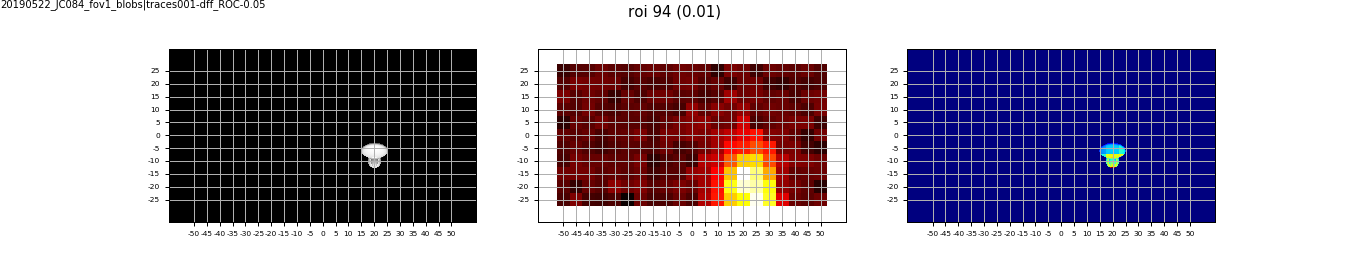

roi00094_M0_sz10


In [427]:
if plot_roi:
    fig = plot_luminance_calculation(imarray, rfarray, lumarray, rfparams,
                                     rf_cmap=rf_cmap, lum_cmap=lum_cmap)

    pl.suptitle('roi %i (%.2f)' % (int(rid+1), fraction_lum))
    label_figure(fig, data_id)

    figname = 'roi%05d_%s_sz%i' % (int(rid+1), curr_object, size_deg) 
    pl.savefig(os.path.join(outdir, 'roi-luminance-arrays', '%s.svg' % figname))
    print(figname)
    
    pl.close()


In [56]:
#rfdf = pd.concat(rfdf, axis=0)


In [58]:
rfdf.head()

,RF_luminance,object,rid,size
1,0.008850,M0,1,10.0
1,0.036365,M0,1,20.0
1,0.068453,M0,1,30.0
1,0.087245,M0,1,40.0
1,0.117461,M0,1,50.0


In [205]:
rid = 155
tmpdf = rfdf[rfdf['rid']==rid]





<IPython.core.display.Javascript object>


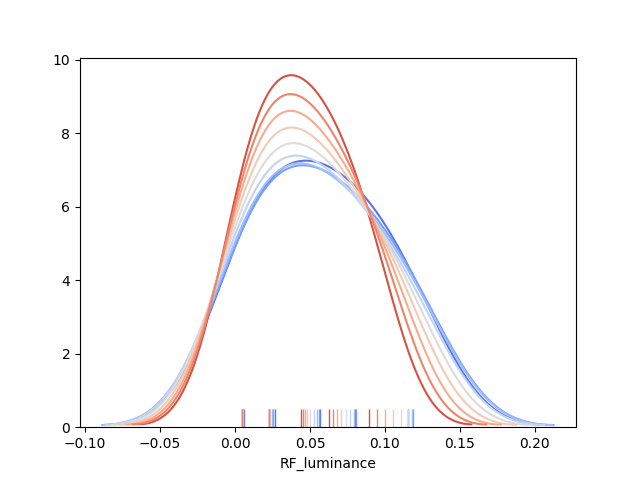

In [208]:
fig, ax = pl.subplots()
for mo, g in tmpdf.groupby(['object']):
    sns.distplot(g['RF_luminance'], color=morph_colors[mo],
                 ax=ax,
                 rug=True,
                 kde=True, hist=False)
                 #hist_kws={"histtype": "step", "linewidth": 3,
                 #           "alpha": 1, "color": morph_colors[mo]})
    

<IPython.core.display.Javascript object>


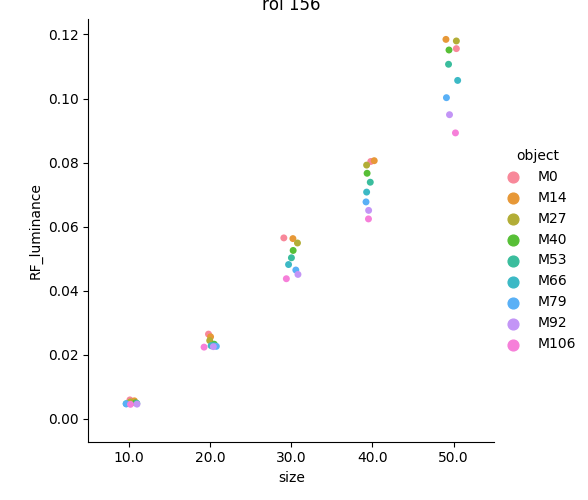

In [209]:
sns.catplot(x='size', y='RF_luminance', hue='object', data=tmpdf)
pl.title('roi %i' % int(rid+1))

pl.savefig(os.path.join(outdir, 'roi-plot-RF-luminance', 'roi%05d.svg' % int(rid+1)))

In [61]:
rid = 9
tmpdf = rfdf[rfdf['rid']==rid]



In [62]:
len(roi_list)

84

In [63]:
84/12.

7.0

In [66]:
morph_cmap = 'coolwarm'
#morph_colors = sns.color_palette('cubehelix', len(image_list))
morphcolor_list = sns.color_palette(morph_cmap, len(image_list))
morph_colors = dict((morph, c) for morph, c in zip(image_list, morphcolor_list))

<IPython.core.display.Javascript object>


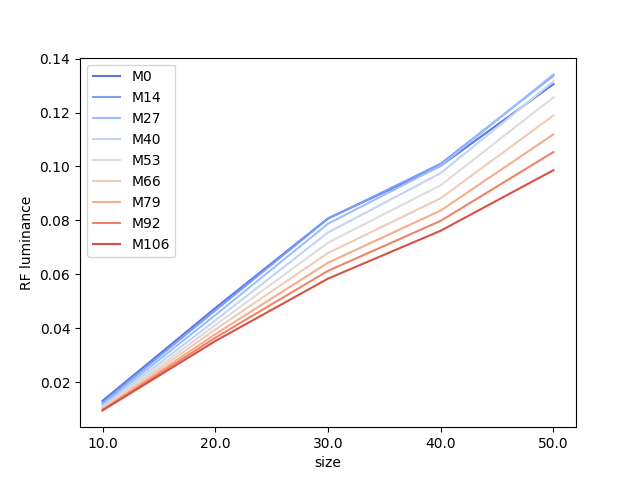

Text(0.5,0,u'size')

In [67]:
fig, ax = pl.subplots()
for morph in image_list:
    g = tmpdf[tmpdf['object']==morph]
    ax.plot(g['size'], g['RF_luminance'], color=morph_colors[morph], label=morph)
ax.legend()
ax.set_xticks(sizes)
ax.set_xticklabels(sizes)
ax.set_ylabel('RF luminance')
ax.set_xlabel('size')

In [68]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
import matplotlib.cm as cm

def create_color_bar(fig, hue_colors, hue_values, hue_param='label', #cmap='cube_helix', 
                     orientation='horizontal', cbar_axes=[0.58, 0.17, 0.3, 0.02]):

    cmap = ListedColormap(hue_colors)
    bounds = np.arange(0, len(hue_values))
    norm = BoundaryNorm(bounds, cmap.N)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array(bounds)

    cbar_ax = fig.add_axes(cbar_axes)
    cbar = fig.colorbar(mappable, cax=cbar_ax, boundaries=np.arange(-0.5,len(hue_values),1), \
                        ticks=bounds, norm=norm, orientation='horizontal')
    cbar.ax.tick_params(axis='both', which='both',length=0)
    cbar.ax.set_xticklabels(hue_values, fontsize=6) #(['%i' % i for i in morphlevels])  # horizontal colorbar
    cbar.ax.set_xlabel(hue_param, fontsize=12)

    return cbar

In [69]:
outdir

'/n/coxfs01/julianarhee/aggregate-visual-areas/luminance-analysis'

In [72]:
data_id

'20190522_JC084_fov1_blobs|traces001-dff_ROC-0.05'

<IPython.core.display.Javascript object>


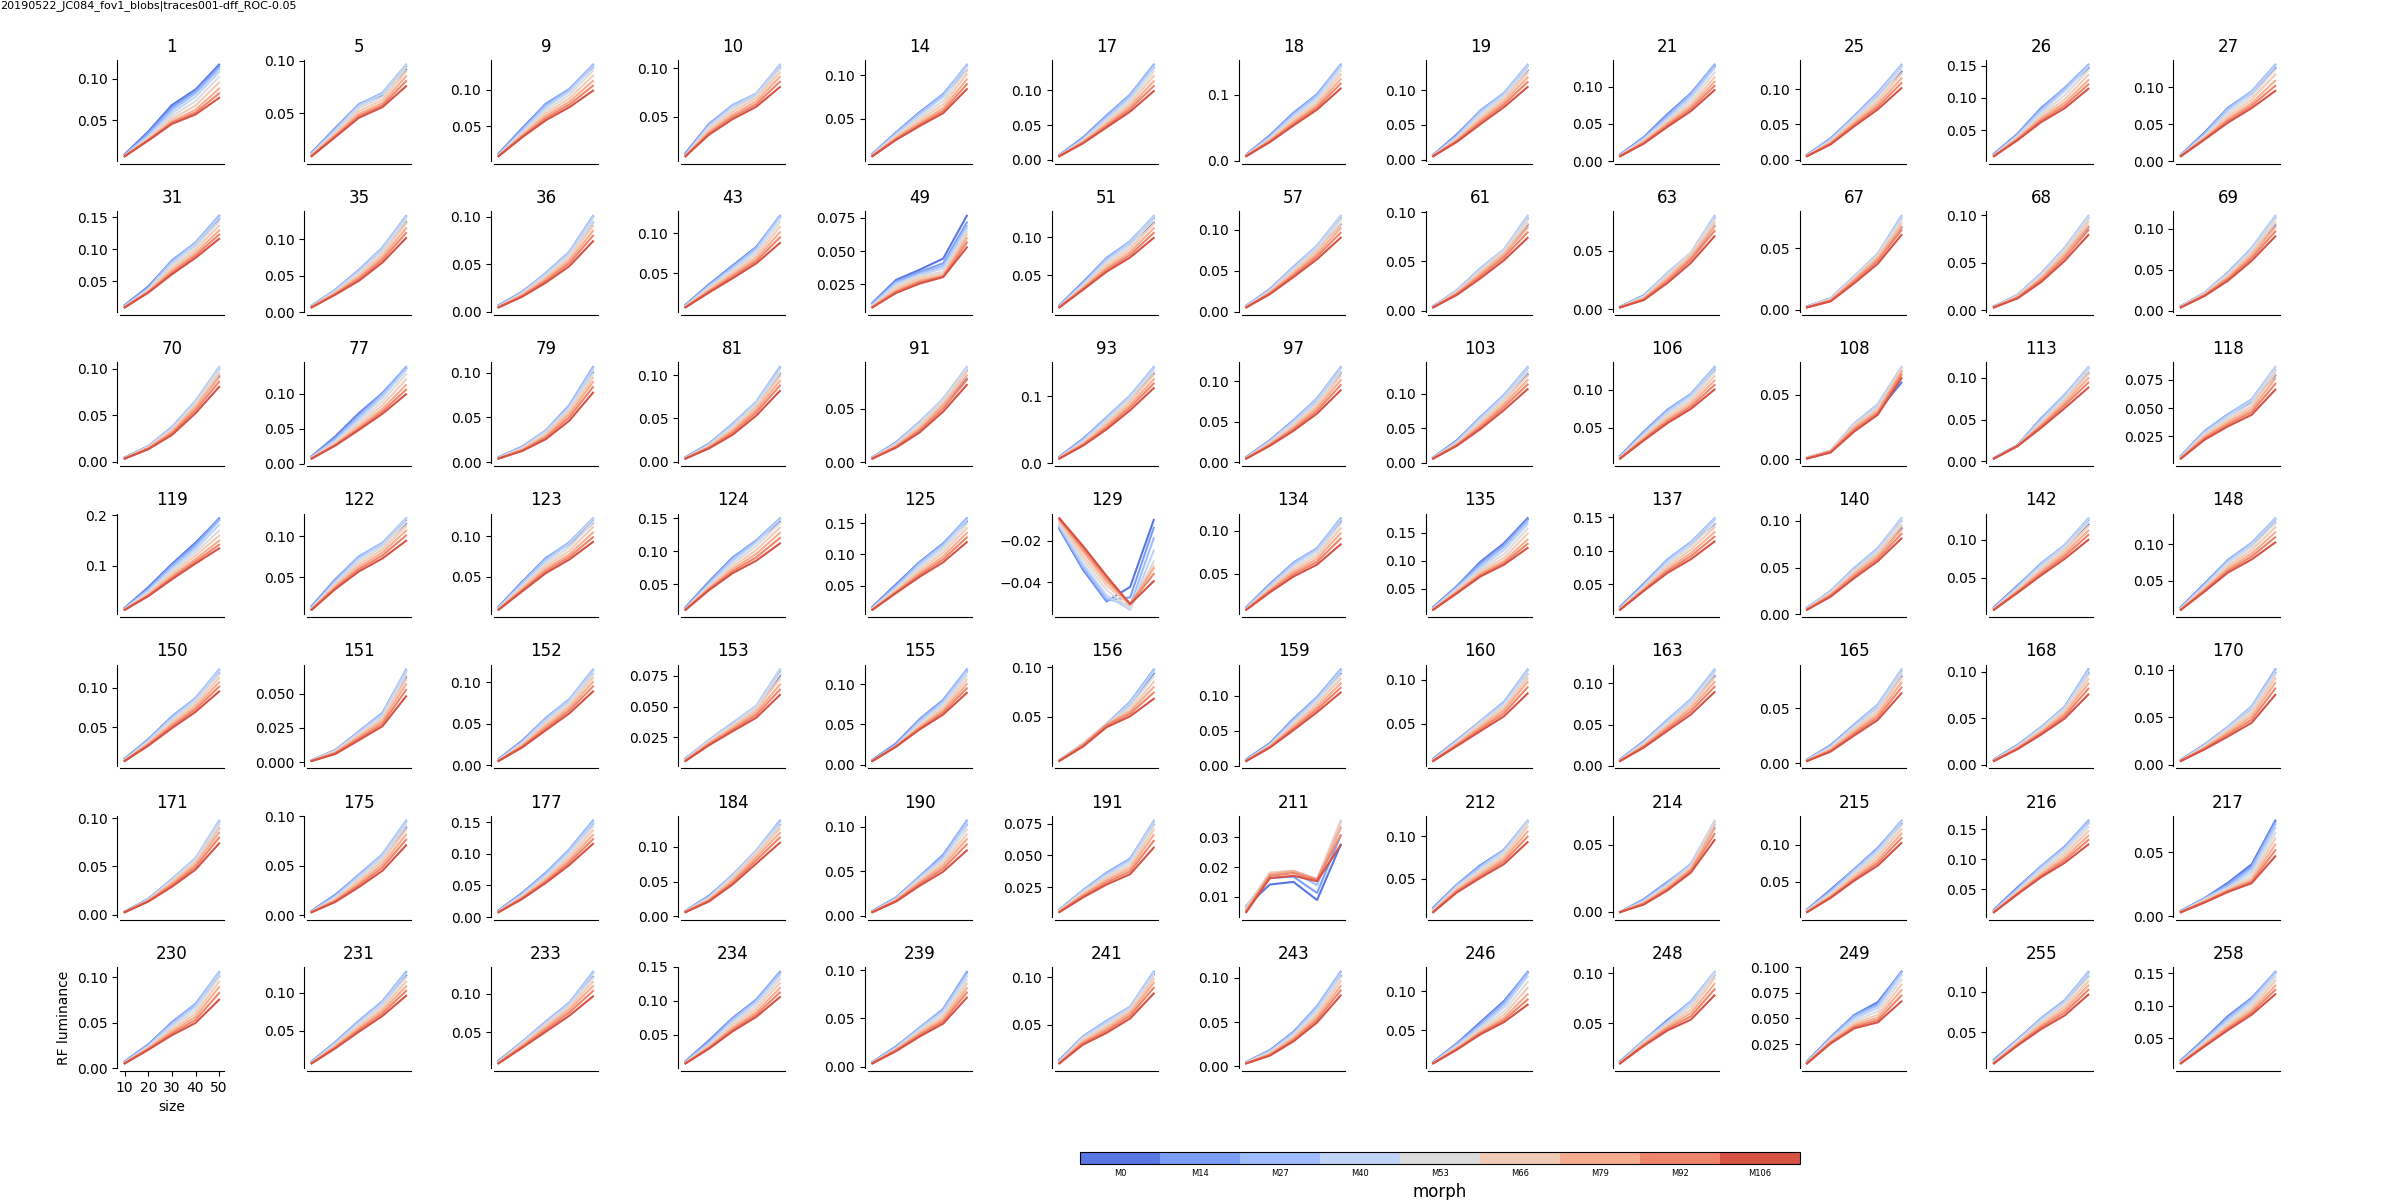

In [234]:
fig, axes = pl.subplots(7, 12, sharex=False, sharey=False, figsize=(24,12))

ai = 0
for rid in roi_list:
    tmpdf = rfdf[rfdf['rid']==rid]
    ax = axes.flat[ai]
    for morph in image_list:
        g = tmpdf[tmpdf['object']==morph]
        ax.plot(g['size'], g['RF_luminance'], color=morph_colors[morph], label=morph)
    #ax.legend()

    if ai==(12*7)-12:
        ax.set_ylabel('RF luminance')
        ax.set_xlabel('size')
        ax.set_xticks(g['size'])
        ax.set_xticklabels([int(s) for s in g['size']])
    else:
        ax.set_xticklabels([])
        ax.set_xticks([])
    sns.despine(ax=ax, trim=False, offset=2)
    ax.set_title(rid)
    ai += 1
    
pl.subplots_adjust(wspace=0.8, hspace=0.5, top=0.95, left=0.05, right=0.95)
cbar = create_color_bar(fig, morphcolor_list, image_list,
                        cbar_axes=[0.45, 0.03, 0.3, 0.01],  hue_param='morph')
label_figure(fig, data_id)
pl.savefig(os.path.join(outdir, 'roi-rf-lums_%s.svg' % datakey))

In [ ]:
session = '20190522'
animalid = 'JC084'
fovnum = 1
datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  

In [424]:
lumarray.sum() / max_lum

0.13340265754874256

<IPython.core.display.Javascript object>


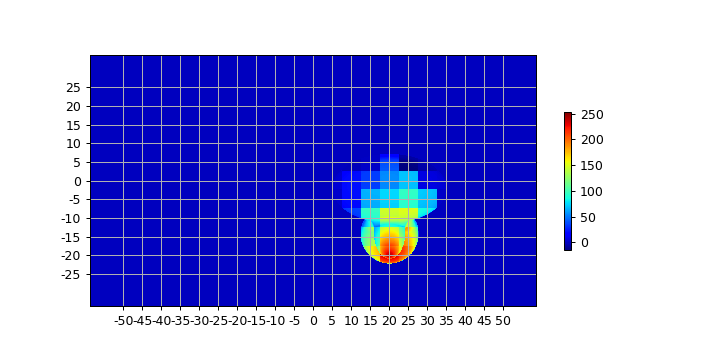

In [163]:
fig, ax = pl.subplots(figsize=(8,4))
im = ax.imshow(lum_array, origin='bottom', alpha=1, cmap='jet')

ax.set_xticks(col_pos_pix)
ax.set_xticklabels([int(i) for i in col_vals])
ax.set_yticks(row_pos_pix)
ax.set_yticklabels([int(i) for i in row_vals])

ax.grid(True)

cbar = fig.colorbar(im, ax=ax, shrink=0.5)
# cbar.set_ticks(np.arange(0, 1.1, 0.5))
# cbar.set_ticklabels(['low', 'medium', 'high'])

# RF luminance sensitivity profile
Visualize object responses, sort by RF luminance

In [224]:
meanresponses = blobstats.groupby(['config']).mean()
meanresponses.shape

(50, 100)

In [226]:
meanresponses[rid].iloc[5:].shape

(45,)

In [212]:
sdf = DATA['%s_blobs' % datakey]['sdf']
sdf.tail()

,color,morphlevel,object,size,stimtype,xpos,ypos,yrot
config046,,106,Blob_N2,10.0,image,20,-8,0
config047,,106,Blob_N2,20.0,image,20,-8,0
config048,,106,Blob_N2,30.0,image,20,-8,0
config049,,106,Blob_N2,40.0,image,20,-8,0
config050,,106,Blob_N2,50.0,image,20,-8,0


In [213]:
morphlevels = sorted(sdf['morphlevel'].unique())
sizes = sorted(sdf['size'].unique())


#### Plot 1 cell

In [215]:
tmpdf = rfdf[rfdf['rid']==rid]

lum_ixs = np.array([sizes.index(s) for s in\
                    tmpdf.groupby(['size']).mean().sort_values(by='RF_luminance').index.tolist()])

mr = np.reshape(meanresponses[rid], (len(morphlevels), len(sizes))).T
mr_sorted = np.empty(mr.shape, dtype=mr.dtype)
for lumbin in lum_ixs:
    within_bin_response = mr[lumbin, :]
    mr_sorted[lumbin, :] = sorted(within_bin_response)
    

<IPython.core.display.Javascript object>


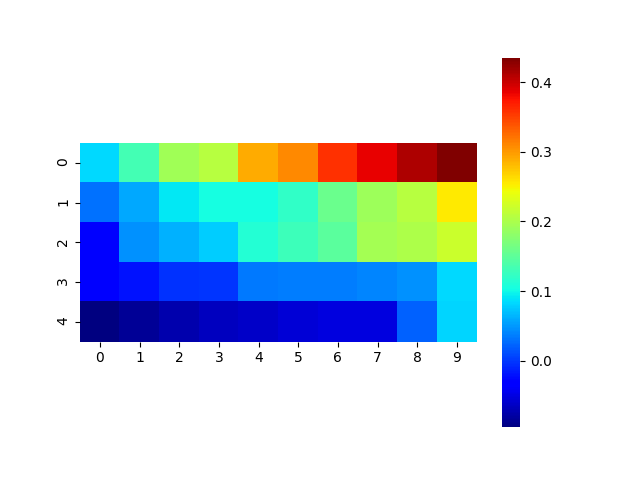

TypeError: only integer scalar arrays can be converted to a scalar index

In [220]:
fig,ax = pl.subplots()
sns.heatmap(mr_sorted, cmap='jet', ax=ax)
ax.set_aspect('equal')
ax.set_xticklabels(sizes[lum_ixs])


#### Plot all cells

<IPython.core.display.Javascript object>


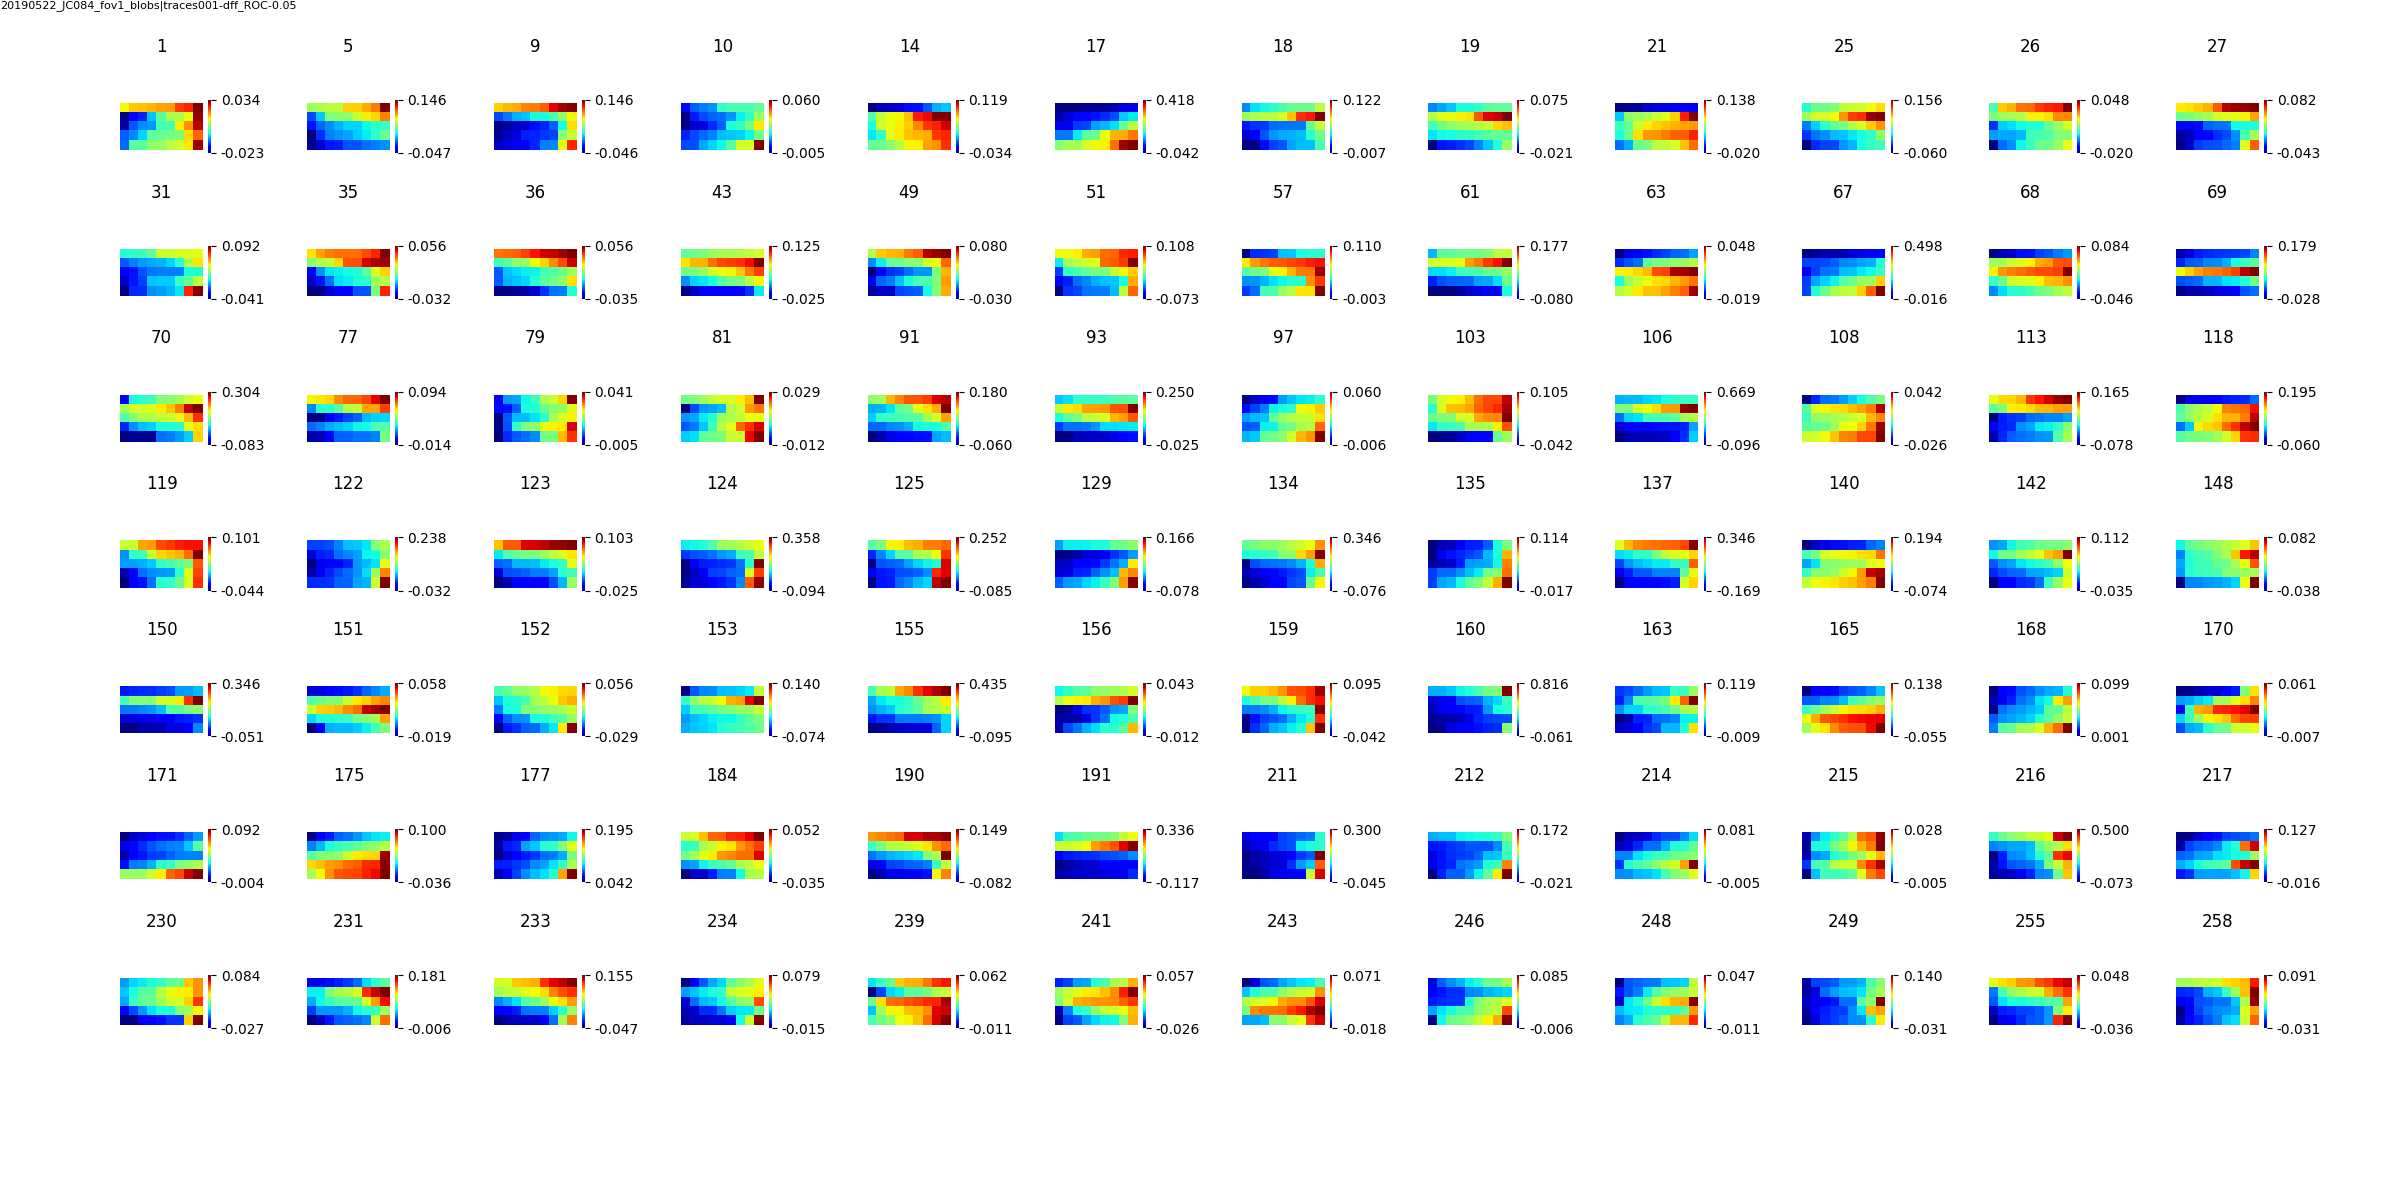

In [246]:
morphlevels = sorted(sdf['morphlevel'].unique())[1:]
sizes = sorted(sdf['size'].unique())

fig, axes = pl.subplots(7, 12, sharex=True, sharey=True, figsize=(24,12))

ai = 0
for rid in roi_list:
    tmpdf = rfdf[rfdf['rid']==rid]
    ax = axes.flat[ai]
    

    lum_ixs = np.array([sizes.index(s) for s in\
                        tmpdf.groupby(['size']).mean().sort_values(by='RF_luminance').index.tolist()])

    mr = np.reshape(meanresponses[rid].iloc[5:], (len(morphlevels), len(sizes))).T
    mr_sorted = np.empty(mr.shape, dtype=mr.dtype)
    for lumbin in lum_ixs:
        within_bin_response = mr[lumbin, :]
        mr_sorted[lumbin, :] = sorted(within_bin_response)

    sns.heatmap(mr_sorted, cmap='jet', ax=ax, robust=True,
                cbar=1, cbar_kws={'shrink': 0.4, 'ticks': [mr_sorted.min(), mr_sorted.max()],
                                 'format': '%.3f'},
                                 vmin=mr_sorted.min(), vmax=mr_sorted.max()) #, 'fontsize': 6})
    ax.set_aspect('equal')
    #ax.set_xticklabels(sizes[lum_ixs])
    ax.set_title(rid)

    ax.axis('off')
    
    if ai==(12*7)-12:
        ax.set_ylabel('RF luminance bin')
        ax.set_xlabel('Ranked morphs')
        ax.set_xticklabels([]); ax.set_xticks([]);
        ax.set_yticklabels([]); ax.set_yticks([]);
    else:
        ax.set_xticklabels([]); ax.set_xticks([]);
        ax.set_yticklabels([]); ax.set_yticks([]);
    ax.set_title(rid)
    ai += 1
    
pl.subplots_adjust(wspace=0.8, hspace=0.1, top=0.95, left=0.05, right=0.95)

label_figure(fig, data_id)
pl.savefig(os.path.join(outdir, 'roi-lum-sensitivity-profiles_%s.svg' % datakey))

In [262]:
morph_colors

{'M0': (0.34832334141176474, 0.46571114650980389, 0.88834616294117641),
 'M106': (0.83936493707843141, 0.32185622094117644, 0.26492398098039216),
 'M14': (0.48385432959999997, 0.62204984959999998, 0.97480820260000001),
 'M27': (0.61931794518823535, 0.74412073476470586, 0.99893091881960783),
 'M40': (0.75361061799999995, 0.83023285099999999, 0.96087115700000003),
 'M53': (0.86742763508627452, 0.86437659977254899, 0.86260246201960789),
 'M66': (0.94734540359999997, 0.79469550479999995, 0.71699050580000001),
 'M79': (0.96849974766666669, 0.67397737977254901, 0.55664925604705884),
 'M92': (0.93183129659999997, 0.51908552320000001, 0.40647960859999999)}

# Calculate mutual information metrics

In [470]:
# fig, ax = pl.subplots()
# for currconfig, g in blobstats[[rid, 'config']].groupby(['config']):
#     currmorph = sdf['morphlevel'][currconfig]
#     currsize = sdf['size'][currconfig]
#     if currsize != 50.:
#         continue
#     if currmorph==-1:
#         currcol = 'k'
#     else:
#         currcol = morph_colors['M%i' % currmorph]
#     sns.distplot(g[rid], color=currcol, ax=ax, hist=False, label=currmorph)


In [ ]:
import math

In [359]:
def populate_bins(roi_responses, rkey='dff', n_bins=3):
    bin_labels = ['bin%i' % int(i+1) for i in np.arange(0, n_bins)]
    results, bin_edges = pd.qcut(roi_responses[rkey],
                                q=n_bins,
                                labels=bin_labels,
                                retbins=True)

#     results_table = pd.DataFrame(zip(bin_edges, bin_labels),
#                                 columns=['Threshold', 'Tier'])
    roi_responses['bin'] = results
    
    return roi_responses

In [464]:
def calculate_mutual_information(tmpd, n_bins=3):
    
    # Discretize df/f values
    tmpd = populate_bins(tmpd, n_bins=n_bins)                             
    #tmpd.groupby(['config'])['bin'].value_counts()

    # Convert responses to prob distN
    n_trials_total = float(tmpd.shape[0])
    n_reps_per_cond = float(tmpd.groupby(['config']).count().iloc[0,0])

    # Count occurrences in each state
    state_counts = tmpd.groupby(['config', 'bin']).size().reset_index(name='count')
    n_per_bin = float(state_counts.groupby(['bin'])['count'].sum().iloc[0])
    state_counts['p(s,r)'] = state_counts['count']/n_trials_total
    p_resp = n_per_bin/n_trials_total # This is uniform (since pd.qcut())
    p_stim = n_reps_per_cond/n_trials_total # This is uniform (since experimental design)

    # Calculate mutual information: 
    mi = np.array([pv*math.log(pv/(p_resp*p_stim), 2) for pv in state_counts['p(s,r)'].values]).sum()
    
    return mi


In [465]:
n_bins = 3

MI = []
for rid in roi_list:
    tmpd = pd.DataFrame(blobstats[[rid, 'config']].values, columns=['dff', 'config'], index=blobstats[rid].index)
    mi = calculate_mutual_information(tmpd, n_bins=n_bins)
    MI.append(mi)
    


<IPython.core.display.Javascript object>


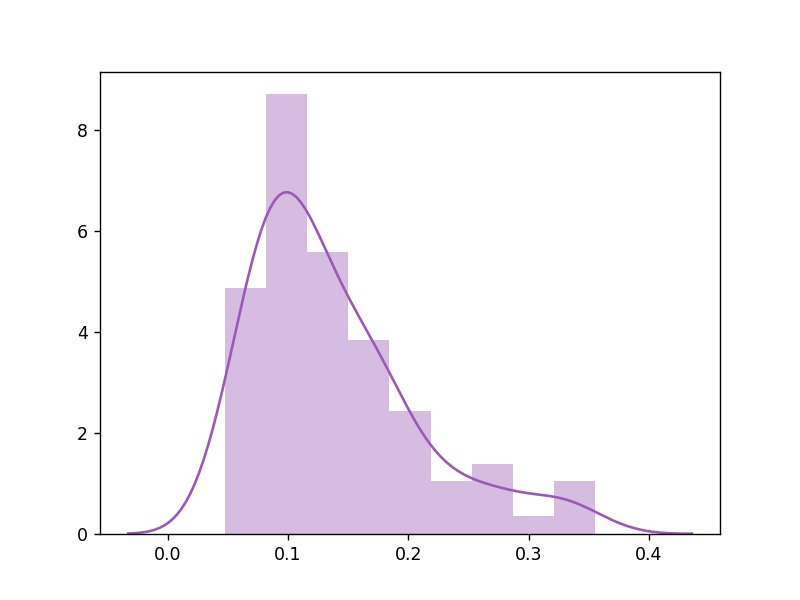

In [466]:
pl.figure()
sns.distplot(MI)

# Calculate for all cells

In [479]:
session, animalid, fovn = datakey.split('_')
dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==int(fovn[3:]))]



,animalid,experiment,fov,session,visual_area,fovnum
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,1
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1,1
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,1
3,JC084,retino,FOV1_zoom2p0x,20190522,V1,1


In [484]:
DATA[datakey] = {'data':

'20190603_JC080_fov1_blobs'

In [485]:
mi_dfs = []
for dii, datakey in enumerate(DATA.keys()):
    session, animalid, fov, currexp = datakey.split('_')
    
    visual_area = dsets[(dsets['animalid']==animalid) \
                        & (dsets['session']==session) \
                        & (dsets['fovnum']==int(fovn[3:]))]['visual_area'].iloc[0]
    #print(visual_area)

    # Add stimulus config info to face data
    trial_key = DATA['%s' % datakey]['trial_key'] #DATA['%s_blobs' % datakey]['labels']
#     trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
#                              for trial, g in labels.groupby(['trial'])],
#                   'trial': [int(trial[5:]) \
#                              for trial, g in labels.groupby(['trial'])]})

    # Get blob stats
    #neuraldata = DATA['%s_blobs' % datakey]['data'].copy()
    neuraldata = DATA['%s' % datakey]['data'].copy()
    blobstats = pd.concat([neuraldata, trial_key], axis=1)
    blobstats.index = blobstats['trial']
    blobstats.drop('trial', axis=1, inplace=True)

    # Calculate MI for all cells
    MI = []
    for rid in roi_list:
        tmpd = pd.DataFrame(blobstats[[rid, 'config']].values, columns=['dff', 'config'], index=blobstats[rid].index)
        mi = calculate_mutual_information(tmpd, n_bins=n_bins)
        MI.append(mi)

    mdf = pd.DataFrame({'MI': MI,
                 'visual_area': [visual_area for _ in np.arange(0, nsamples)],
                 'datakey': [datakey for _ in np.arange(0, nsamples)],
                 }, index=[dii])

mi_dfs.append(mdf)


KeyError: '[1] not in index'

In [488]:
blobstats.head()

,2,4,6,7,8,11,18,19,22,27,...,240,253,256,257,258,266,267,270,274,config
trial,,,,,,,,,,,,,,,,,,,,,
1,0.269366,0.029987,0.255858,-0.142138,0.494458,0.000537,-0.059028,-0.029143,-0.127631,0.053482,...,0.172254,0.139002,-0.031729,0.035675,0.166911,0.010134,-0.032300,0.369943,0.006881,config048
2,0.037755,0.005274,-0.062811,-0.067312,0.146084,-0.019554,-0.069465,0.011173,-0.137038,0.192916,...,0.101034,0.118236,0.014994,-0.012186,0.028973,0.003365,-0.034803,0.004923,-0.055265,config037
3,0.238751,0.166736,0.109413,-0.008974,0.251674,0.053751,-0.052027,-0.052400,0.017862,-0.022374,...,0.092022,0.103628,0.025369,0.115065,0.037186,-0.027071,-0.123008,0.031496,-0.048196,config008
4,0.196926,0.119895,0.060957,0.000670,0.147306,0.205086,-0.036612,0.143403,-0.033640,0.077691,...,0.011611,0.153324,0.092888,-0.040492,0.129265,0.174074,-0.030982,0.014242,0.014839,config050
5,-0.068730,-0.057356,-0.062053,-0.148546,-0.067473,0.122389,0.125385,0.026495,0.124814,0.030202,...,0.027234,1.352994,-0.036184,0.048453,0.041410,0.043717,0.067197,-0.090079,0.103641,config044


In [390]:
def subtract_condition_mean(neuraldata, labels, included_trials):
    
    
    # Remove excluded trials and Calculate neural residuals
    trial_configs = pd.DataFrame(np.vstack([g['config'].iloc[0]\
                                        for trial, g in labels.groupby(['trial']) \
                                           if int(trial[5:]) in included_trials]), columns=['config']) # trials should be 1-indexed
    trial_configs = trial_configs.loc[included_trial_ixs]
    
    # Do mean subtraction for neural data
    residuals_neural = neuraldata.copy()
    for c, g in trial_configs.groupby(['config']):
        residuals_neural.loc[g.index] = neuraldata.loc[g.index] - neuraldata.loc[g.index].mean(axis=0)

    # Do mean subtraction for pupil data
#     residuals_pupil = pupilstats.copy()
#     for c, g in pupilstats.groupby(['config']):
#         residuals_pupil['pupil'][g.index] = pupilstats.loc[g.index]['pupil'] - pupilstats.loc[g.index]['pupil'].mean()
    

    return residuals_neural


In [410]:
class struct():
    pass

import scipy.stats as spstats